### 가설: 흡연 상태와 음주 여부는 체중에 영향을 미칠 것이며, 흡연을 하고 음주를 하는 경우 체중이 증가할 것이다

분석 인사이트:

- 흡연 상태와 음주 여부에 따라 체중의 분포가 어떻게 달라지는지 확인할 수 있다.
- 흡연을 하고 음주를 하는 경우와 하지 않는 경우의 평균 체중을 비교하여 어떤 경우가 더 높은지 확인할 수 있다.
- 추가적으로 각 그룹의 체중 평균에 대한 가설 검정을 통해 통계적으로 유의미한 차이가 있는지 확인할 수 있다.


------------------
구체적인 솔루션:

- 흡연 상태와 음주 여부에 따른 체중의 분포를 시각화하여 비교한다.
- 각 그룹의 평균 체중을 계산하고 비교한다.
- 가설 검정을 통해 흡연 및 음주 여부가 체중에 미치는 영향을 통계적으로 검증한다.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [3]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [4]:
pre_check = df[['신장(5Cm단위)', '체중(5Kg 단위)', '흡연상태', '음주여부']]
pre_check

,신장(5Cm단위),체중(5Kg 단위),흡연상태,음주여부
0,170.0,65.0,3.0,0.0
1,150.0,45.0,1.0,0.0
2,175.0,75.0,1.0,0.0
3,155.0,55.0,1.0,1.0
4,175.0,75.0,3.0,0.0
...,...,...,...,...
999995,165.0,55.0,1.0,1.0
999996,165.0,50.0,1.0,0.0
999997,155.0,50.0,1.0,0.0
999998,160.0,70.0,2.0,1.0


In [5]:
pre_check['흡연상태'] = pre_check['흡연상태'].apply(lambda x : True if x==3.0  else False)
pre_check['음주여부'] = pre_check['음주여부'].apply(lambda y: True if y==1.0  else False)
pre_check

C:\Users\jh060\AppData\Local\Temp\ipykernel_30204\3630768687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_check['흡연상태'] = pre_check['흡연상태'].apply(lambda x : True if x==3.0  else False)
C:\Users\jh060\AppData\Local\Temp\ipykernel_30204\3630768687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_check['음주여부'] = pre_check['음주여부'].apply(lambda y: True if y==1.0  else False)


,신장(5Cm단위),체중(5Kg 단위),흡연상태,음주여부
0,170.0,65.0,True,False
1,150.0,45.0,False,False
2,175.0,75.0,False,False
3,155.0,55.0,False,True
4,175.0,75.0,True,False
...,...,...,...,...
999995,165.0,55.0,False,True
999996,165.0,50.0,False,False
999997,155.0,50.0,False,False
999998,160.0,70.0,False,True


In [6]:
#결측치 제거 
pre_check.dropna(inplace=True)
pre_check.isnull().sum()

C:\Users\jh060\AppData\Local\Temp\ipykernel_30204\1313727792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_check.dropna(inplace=True)


신장(5Cm단위)     0
체중(5Kg 단위)    0
흡연상태          0
음주여부          0
dtype: int64

In [7]:
#비만 판단 기준이 우리나라에서 BMi 25 이상이라는 것 이용하여 비만인 사람들과 아닌 사람들 분리
pre_check['BMI'] = pre_check['체중(5Kg 단위)'] / ((pre_check['신장(5Cm단위)']/100)**2)
pre_check['비만여부'] = pre_check['BMI'].apply(lambda x : True if x>=25 else False)
pre_check

C:\Users\jh060\AppData\Local\Temp\ipykernel_30204\636227192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_check['BMI'] = pre_check['체중(5Kg 단위)'] / ((pre_check['신장(5Cm단위)']/100)**2)
C:\Users\jh060\AppData\Local\Temp\ipykernel_30204\636227192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_check['비만여부'] = pre_check['BMI'].apply(lambda x : True if x>=25 else False)


,신장(5Cm단위),체중(5Kg 단위),흡연상태,음주여부,BMI,비만여부
0,170.0,65.0,True,False,22.491349,False
1,150.0,45.0,False,False,20.000000,False
2,175.0,75.0,False,False,24.489796,False
3,155.0,55.0,False,True,22.892820,False
4,175.0,75.0,True,False,24.489796,False
...,...,...,...,...,...,...
999995,165.0,55.0,False,True,20.202020,False
999996,165.0,50.0,False,False,18.365473,False
999997,155.0,50.0,False,False,20.811655,False
999998,160.0,70.0,False,True,27.343750,True


In [8]:
smoke_true = pre_check[pre_check['흡연상태']==True]
smoke_false = pre_check[pre_check['흡연상태']==False]
alc_true = pre_check[pre_check['음주여부']==True]
alc_false = pre_check[pre_check['음주여부']==False]
smoke_true

,신장(5Cm단위),체중(5Kg 단위),흡연상태,음주여부,BMI,비만여부
0,170.0,65.0,True,False,22.491349,False
4,175.0,75.0,True,False,24.489796,False
6,175.0,110.0,True,True,35.918367,True
12,170.0,50.0,True,False,17.301038,False
19,150.0,50.0,True,True,22.222222,False
...,...,...,...,...,...,...
999989,175.0,65.0,True,True,21.224490,False
999991,165.0,65.0,True,False,23.875115,False
999992,160.0,50.0,True,True,19.531250,False
999993,175.0,95.0,True,True,31.020408,True


## 흡연, 음주의 비만 상관관계

Text(0.5, 1.0, '비음주자 수')

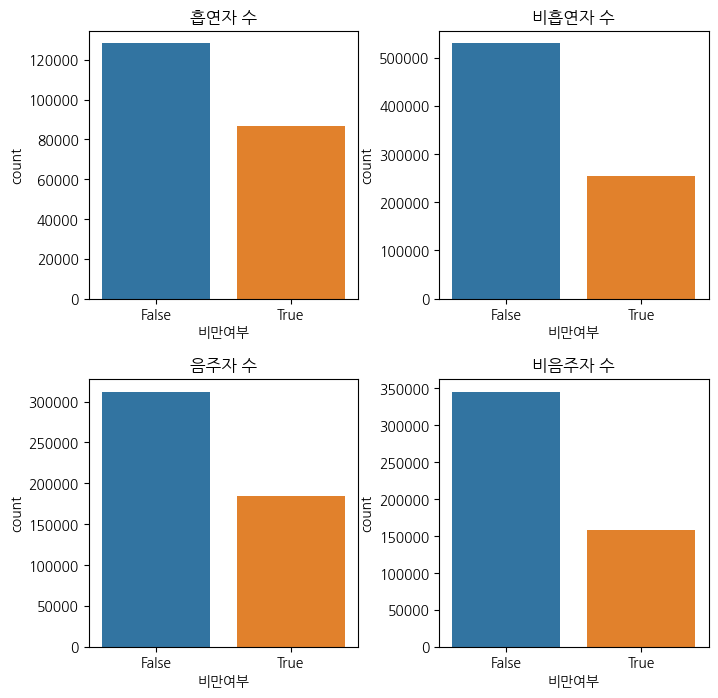

In [11]:
#흡연과 비만의 상관관계 시각화
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.countplot(x='비만여부', data=smoke_true, ax=axes[0][0])
sns.countplot(x='비만여부', data=smoke_false, ax=axes[0][1])
sns.countplot(x='비만여부', data=alc_true, ax=axes[1][0])
sns.countplot(x='비만여부', data=alc_false, ax=axes[1][1])
axes[0][0].set_title('흡연자 수')
axes[0][1].set_title('비흡연자 수')
axes[1][0].set_title('음주자 수')
axes[1][1].set_title('비음주자 수')

## 흡연하는 사람과 음주하는 사람의 상관관계

In [9]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"] = df['흡연상태'].map(smoke)
df["음주"] = df['음주여부'].map(drink)

<Axes: xlabel='흡연', ylabel='count'>

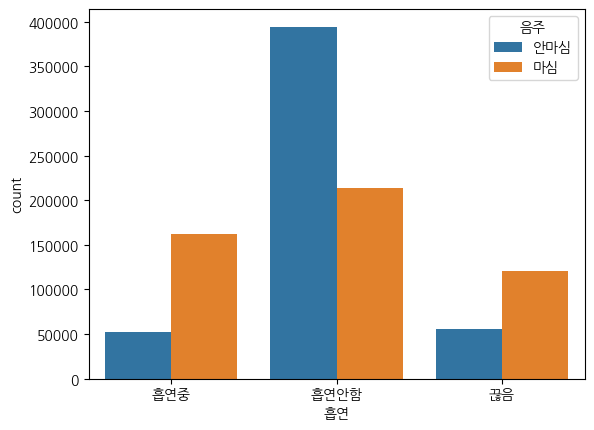

In [10]:
import seaborn as sns

sns.countplot(data=df, x="흡연", hue="음주")

Text(0.5, 1.0, '흡연 상태에 따른 체중 분포')

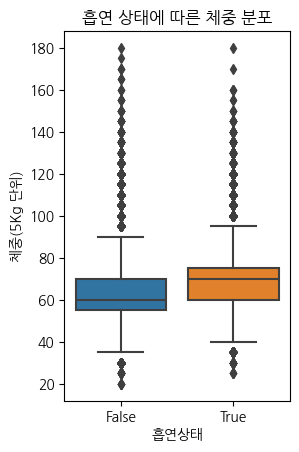

In [13]:
# 흡연 상태에 따른 체중 분포
plt.subplot(1, 2, 1)
sns.boxplot(x='흡연상태', y='체중(5Kg 단위)', data=pre_check)
plt.title('흡연 상태에 따른 체중 분포')

Text(0.5, 1.0, '음주 여부에 따른 체중 분포')

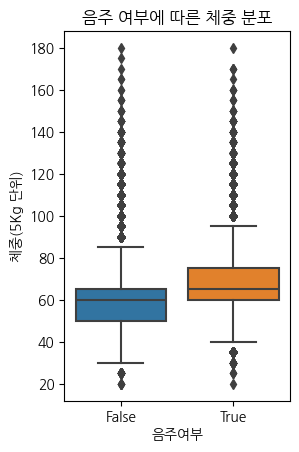

In [14]:
# 음주 여부에 따른 체중 분포
plt.subplot(1, 2, 2)
sns.boxplot(x='음주여부', y='체중(5Kg 단위)', data=pre_check)
plt.title('음주 여부에 따른 체중 분포')

In [15]:
# 각 그룹의 평균 체중 계산
mean_weight_by_smoking = pre_check.groupby('흡연상태')['체중(5Kg 단위)'].mean()
mean_weight_by_drinking = pre_check.groupby('음주여부')['체중(5Kg 단위)'].mean()

In [16]:
print("흡연 상태에 따른 평균 체중:\n", mean_weight_by_smoking)

흡연 상태에 따른 평균 체중:
 흡연상태
False    61.702673
True     69.638018
Name: 체중(5Kg 단위), dtype: float64


In [17]:
print("\n음주 여부에 따른 평균 체중:\n", mean_weight_by_drinking)


음주 여부에 따른 평균 체중:
 음주여부
False    60.083228
True     66.778226
Name: 체중(5Kg 단위), dtype: float64


## 솔루션

- 음주 여부에 따라 체중 변화를 관찰하여 건강에 미치는 영향을 파악할 수 있습니다. 음주를 하는 경우 체중이 증가할 수 있으므로 음주 습관을 변경하거나 관리하는 것이 중요

- 음주 여부와 함께 다른 건강 관련 요인을 고려하여 체중 관리에 대한 종합적인 접근 방식을 채택할 필요가 있다. 예를 들어 식습관, 운동 습관 등을 함께 고려하여 건강한 체중을 유지하는 것이 중요할 것이다.

----------------------

- 흡연을 하지 않거나 흡연을 줄이는 것이 체중 관리에 도움이 될 수 있다. 흡연은 신체에 해로운 영향을 줄 수 있으며, 체중 증가의 원인이 될 수 있을 것이다.

- 건강한 생활습관을 유지하고 흡연을 피하는 것이 중요하다. 이를 위해 흡연을 하지 않는 환경을 조성하고, 흡연을 대체할 수 있는 건강한 습관을 찾는 것이 중요하다.